In [146]:
number_of_nodes = 1000
number_of_runs = 1000
random_test = 200


In [147]:
%%bash
rm results.txt
make
for i in {1..1000}
do ./Binarysearchtree 1000 $((1 + $RANDOM % 100)) 200 >> results.txt
done


removed directory 'bin'
'obj/bst.o' rimosso
'obj/main.o' rimosso
removed directory 'obj'
mkdir -p obj
g++ -Wall -Wextra -std=c++17 -I/src/include -c src/bst.cc -o obj/bst.o
g++ -Wall -Wextra -std=c++17 -I/src/include -c src/main.cc -o obj/main.o
mkdir -p bin
g++  obj/bst.o obj/main.o  -o Binarysearchtree


In [148]:
with open('results.txt') as results:
    txt_results = [line.strip() for line in results.readlines()]


In [149]:
run_sep = "********************************************"
runs = [[] for _ in range(number_of_runs)]
run = -1
for i in txt_results:
    if i == run_sep:
        run += 1
    runs[run].append(i)


In [150]:
import re

re_times = re.compile('[0-9][0-9]+.ns')
times_list = [[] for _ in range(number_of_runs)]
for count, run in enumerate(runs):
    for i in run:
        found = re.match(re_times, str(i))
        if found is not None:
            times_list[count].append(int(found.group().split()[0]))


In [151]:
insert_BST = [[] for _ in range(number_of_runs)]
insert_map = [[] for _ in range(number_of_runs)]
copy_BST = [[] for _ in range(number_of_runs)]
copy_map = [[] for _ in range(number_of_runs)]
find_BST = [[] for _ in range(number_of_runs)]
find_map = [[] for _ in range(number_of_runs)]
modify_BST = [[] for _ in range(number_of_runs)]
modify_map = [[] for _ in range(number_of_runs)]
erase_BST = [[] for _ in range(number_of_runs)]
erase_map = [[] for _ in range(number_of_runs)]


for c, v in enumerate(times_list):
    insert_BST[c] = [i for i in v[0: number_of_nodes]]
    insert_map[c] = [i for i in v[number_of_nodes: number_of_nodes*2]]
    copy_BST[c] = [i for i in v[number_of_nodes*2: number_of_nodes*3]]
    copy_map[c] = [i for i in v[number_of_nodes*3: number_of_nodes*4]]
    find_BST[c] = [i for i in v[number_of_nodes*4: number_of_nodes*4+random_test]]
    find_map[c] = [i for i in v[number_of_nodes*4 +
                                random_test: number_of_nodes*4+2*random_test]]
    modify_BST[c] = [i for i in v[number_of_nodes*4 +
                                  2*random_test: number_of_nodes*4+3*random_test]]
    modify_map[c] = [i for i in v[number_of_nodes*4 +
                                  3*random_test: number_of_nodes*4+4*random_test]]
    erase_BST[c] = [i for i in v[number_of_nodes*4+4 *
                                 random_test: number_of_nodes*4+5*random_test]]
    erase_map[c] = [i for i in v[number_of_nodes*4+5 *
                                 random_test: number_of_nodes*4+6*random_test]]


In [152]:
import pandas as pd
import numpy as np

###########################################################
insert_BST_mean = np.mean(np.array(insert_BST), axis=0)
insert_BST_std = np.std(np.array(insert_BST), axis=0)

insert_map_mean = np.mean(np.array(insert_map), axis=0)
insert_map_std = np.std(np.array(insert_map), axis=0)
###########################################################
copy_BTS_mean = np.mean(np.array(copy_BST), axis=0)
copy_BTS_std = np.std(np.array(copy_BST), axis=0)

copy_map_mean = np.mean(np.array(copy_map), axis=0)
copy_map_std = np.std(np.array(copy_map), axis=0)
###########################################################
find_BST_mean = np.mean(np.array(find_BST), axis=0)
find_BST_std = np.std(np.array(find_BST), axis=0)

find_map_mean = np.mean(np.array(find_map), axis=0)
find_map_std = np.std(np.array(find_map), axis=0)
###########################################################
modify_BST_mean = np.mean(np.array(modify_BST), axis=0)
modify_BST_std = np.std(np.array(modify_BST), axis=0)

modify_map_mean = np.mean(np.array(modify_map), axis=0)
modify_map_std = np.std(np.array(modify_map), axis=0)
###########################################################
erase_BST_mean = np.mean(np.array(erase_BST), axis=0)
erase_BST_std = np.std(np.array(erase_BST), axis=0)

erase_map_mean = np.mean(np.array(erase_map), axis=0)
erase_map_std = np.std(np.array(erase_map), axis=0)


Text(0.5, 1.0, 'BST insert time')

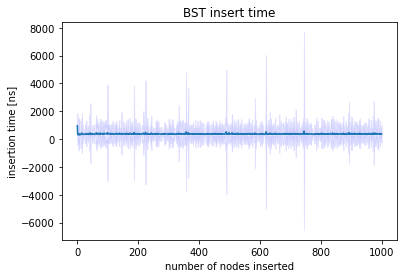

In [153]:
from matplotlib import pyplot as plt

# INSERT BST
x = np.linspace(0, number_of_nodes, number_of_nodes)
fig, ax = plt.subplots()
ax.plot(x, insert_BST_mean)
ax.fill_between(x, (insert_BST_mean-insert_BST_std),
                (insert_BST_mean+insert_BST_std), color='b', alpha=.1)
ax.set_xlabel('number of nodes inserted')
ax.set_ylabel('insertion time [ns]')
ax.set_title("BST insert time")


Text(0.5, 1.0, 'MAP insert time')

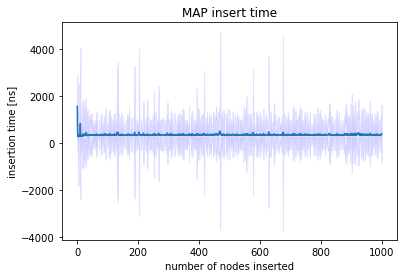

In [154]:
# INSERT MAP
x = np.linspace(0, number_of_nodes, number_of_nodes)
fig, ax = plt.subplots()
ax.plot(x, insert_map_mean)
ax.fill_between(x, (insert_map_mean-insert_map_std),
                (insert_map_mean+insert_map_std), color='b', alpha=.1)
ax.set_xlabel('number of nodes inserted')
ax.set_ylabel('insertion time [ns]')
ax.set_title("MAP insert time")


Text(0.5, 1.0, 'BST and MAP insert time')

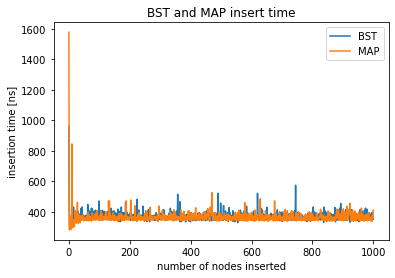

In [155]:
# INSERT MAP
x = np.linspace(0, number_of_nodes, number_of_nodes)
fig, ax = plt.subplots()
ax.plot(x, insert_BST_mean)
ax.plot(x, insert_map_mean)
ax.legend(["BST","MAP" ])
ax.set_xlabel('number of nodes inserted')
ax.set_ylabel('insertion time [ns]')
ax.set_title("BST and MAP insert time")

Text(0.5, 1.0, 'BST copy time')

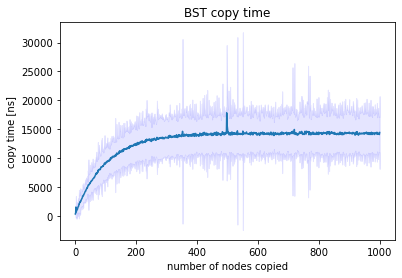

In [156]:

# COPY BST
x = np.linspace(0, number_of_nodes, number_of_nodes)
fig, ax = plt.subplots()
ax.plot(x, copy_BTS_mean)
ax.fill_between(x, (copy_BTS_mean-copy_BTS_std),
                (copy_BTS_mean+copy_BTS_std), color='b', alpha=.1)
ax.set_xlabel('number of nodes copied')
ax.set_ylabel('copy time [ns]')
ax.set_title("BST copy time")


Text(0.5, 1.0, 'MAP copy time')

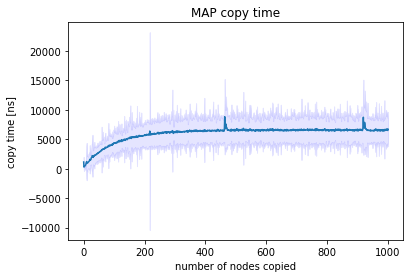

In [157]:
# COPY MAP
x = np.linspace(0, number_of_nodes, number_of_nodes)
fig, ax = plt.subplots()
ax.plot(x, copy_map_mean)
ax.fill_between(x, (copy_map_mean-copy_map_std),
                (copy_map_mean+copy_map_std), color='b', alpha=.1)
ax.set_xlabel('number of nodes copied')
ax.set_ylabel('copy time [ns]')
ax.set_title("MAP copy time")


Text(0.5, 1.0, 'copy time')

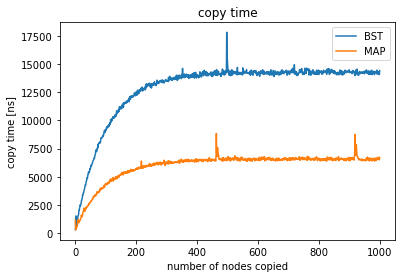

In [158]:
# COPY BST
x = np.linspace(0, number_of_nodes, number_of_nodes)
fig, ax = plt.subplots()
ax.plot(x, copy_BTS_mean)
ax.plot(x, copy_map_mean)
ax.legend(["BST","MAP" ])
ax.set_xlabel('number of nodes copied')
ax.set_ylabel('copy time [ns]')
ax.set_title("copy time")

In [159]:
print(np.mean(copy_BTS_mean)) 
print(np.mean(copy_map_mean))

12891.359105
5959.781003


Text(0.5, 1.0, 'BST find time')

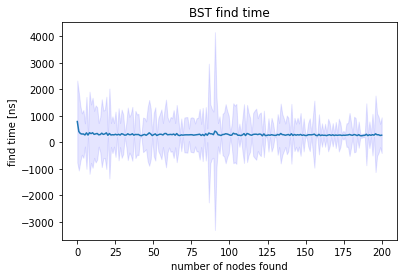

In [160]:
# FIND BST
x = np.linspace(0, random_test, random_test)
fig, ax = plt.subplots()
ax.plot(x, find_BST_mean)
ax.fill_between(x, (find_BST_mean-find_BST_std),
                (find_BST_mean+find_BST_std), color='b', alpha=.1)
ax.set_xlabel('number of nodes found')
ax.set_ylabel('find time [ns]')
ax.set_title("BST find time")


Text(0.5, 1.0, 'MAP find time')

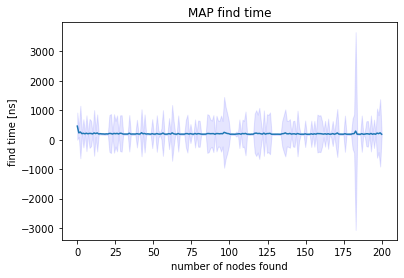

In [161]:
# FIND MAP
x = np.linspace(0, random_test, random_test)
fig, ax = plt.subplots()
ax.plot(x, find_map_mean)
ax.fill_between(x, (find_map_mean-find_map_std),
                (find_map_mean+find_map_std), color='b', alpha=.1)
ax.set_xlabel('number of nodes found')
ax.set_ylabel('find time [ns]')
ax.set_title("MAP find time")


Text(0.5, 1.0, 'find time')

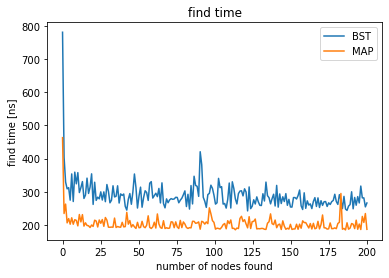

In [162]:
# FIND MAP
x = np.linspace(0, random_test, random_test)
fig, ax = plt.subplots()
ax.plot(x, find_BST_mean)
ax.plot(x, find_map_mean)
ax.legend(["BST","MAP" ])
ax.set_xlabel('number of nodes found')
ax.set_ylabel('find time [ns]')
ax.set_title("find time")

Text(0.5, 1.0, 'BST modify time')

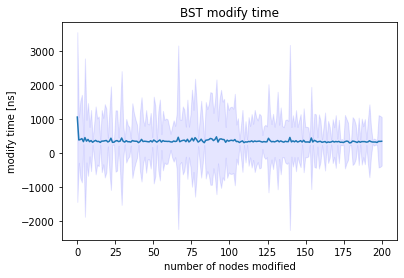

In [163]:
# MODIFY BST
x = np.linspace(0, random_test, random_test)
fig, ax = plt.subplots()
ax.plot(x, modify_BST_mean)
ax.fill_between(x, (modify_BST_mean-modify_BST_std),
                (modify_BST_mean+modify_BST_std), color='b', alpha=.1)
ax.set_xlabel('number of nodes modified')
ax.set_ylabel('modify time [ns]')
ax.set_title("BST modify time")


Text(0.5, 1.0, 'MAP modify time')

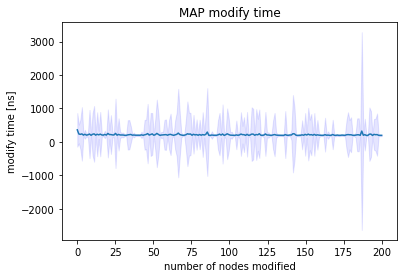

In [164]:
# MODIFY MAP
x = np.linspace(0, random_test, random_test)
fig, ax = plt.subplots()
ax.plot(x, modify_map_mean)
ax.fill_between(x, (modify_map_mean-modify_map_std),
                (modify_map_mean+modify_map_std), color='b', alpha=.1)
ax.set_xlabel('number of nodes modified')
ax.set_ylabel('modify time [ns]')
ax.set_title("MAP modify time")


Text(0.5, 1.0, 'modify time')

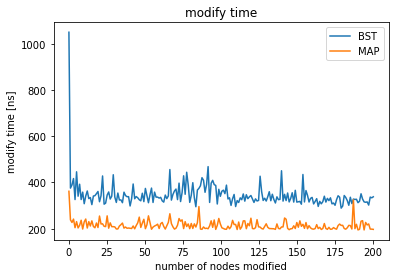

In [165]:
# MODIFY MAP
x = np.linspace(0, random_test, random_test)
fig, ax = plt.subplots()
ax.plot(x, modify_BST_mean)
ax.plot(x, modify_map_mean)
ax.legend(["BST","MAP" ])
ax.set_xlabel('number of nodes modified')
ax.set_ylabel('modify time [ns]')
ax.set_title("modify time")

Text(0.5, 1.0, 'BST erase time')

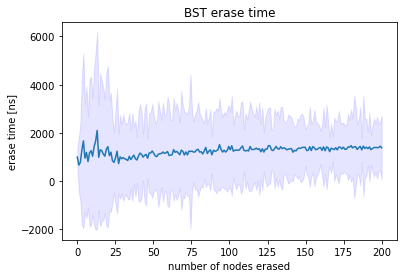

In [166]:
# ERASE BST
x = np.linspace(0, random_test, random_test)
fig, ax = plt.subplots()
ax.plot(x, erase_BST_mean)
ax.fill_between(x, (erase_BST_mean-erase_BST_std),
                (erase_BST_mean+erase_BST_std), color='b', alpha=.1)
ax.set_xlabel('number of nodes erased')
ax.set_ylabel('erase time [ns]')
ax.set_title("BST erase time")


Text(0.5, 1.0, 'MAP erase time')

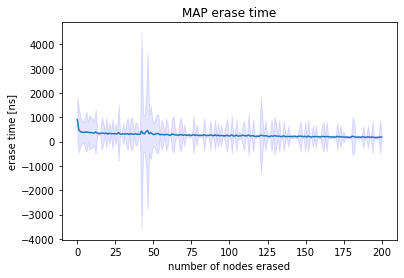

In [167]:
# ERASE MAP
x = np.linspace(0, random_test, random_test)
fig, ax = plt.subplots()
ax.plot(x, erase_map_mean)
ax.fill_between(x, (erase_map_mean-erase_map_std),
                (erase_map_mean+erase_map_std), color='b', alpha=.1)
ax.set_xlabel('number of nodes erased')
ax.set_ylabel('erase time [ns]')
ax.set_title("MAP erase time")


Text(0.5, 1.0, 'erase time')

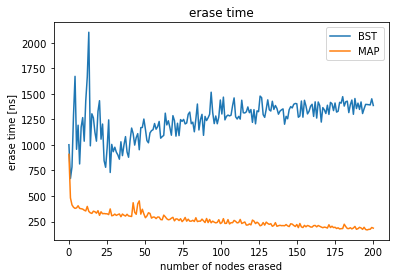

In [168]:
#ERASE 
x = np. linspace(0, random_test, random_test)
fig, ax = plt.subplots()
ax.plot(x, erase_BST_mean)
ax.plot(x, erase_map_mean)
ax.legend(["BST","MAP" ])
ax.set_xlabel('number of nodes erased')
ax.set_ylabel('erase time [ns]')
ax.set_title("erase time")

In [169]:
import pandas as pd

data = pd.DataFrame({
    'insert_BST_mean': pd.Series(insert_BST_mean),
    'insert_BST_std ': pd.Series(insert_BST_std),
    'insert_map_mean': pd.Series(insert_map_mean),
    'insert_map_std': pd.Series(insert_map_std),
    ###########################################################
    'copy_BTS_mean': pd.Series(copy_BTS_mean),
    'copy_BTS_std': pd.Series(copy_BTS_std),
    'copy_map_mean': pd.Series(copy_map_mean),
    'copy_map_std': pd.Series(copy_map_std),
    ###########################################################
    'find_BST_mean': pd.Series(find_BST_mean),
    'find_BST_std': pd.Series(find_BST_std),
    'find_map_mean': pd.Series(find_map_mean),
    'find_map_std': pd.Series(find_map_std),
    ###########################################################
    'modify_BST_mean': pd.Series(modify_BST_mean),
    'modify_BST_std': pd.Series(modify_BST_std),
    'modify_map_mean': pd.Series(modify_map_mean),
    'modify_map_std': pd.Series(modify_map_std),
    ###########################################################
    'erase_BST_mean': pd.Series(erase_BST_mean),
    'erase_BST_std': pd.Series(erase_BST_std),
    'erase_map_std': pd.Series(erase_map_mean)})

data.to_csv('bemchmark_data.csv')
